In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

# ШАГ 1

In [3]:
df=pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# ШАГ 2

In [4]:
df.columns=df.columns.str.lower() #Привел названия столбцов к нижнему регистру

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Думаю нужно изменить тип данных в столбцах: year_of_release на int, user_score на float

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В year_of_release есть пропуски, чтобы поменять тип данных придется заполнить их нулями

In [8]:
print(df['year_of_release'].min(),df['year_of_release'].max()) #Это для дальнейшего развлечения с функцией

1980.0 2016.0


In [9]:
df['year_of_release']=df['year_of_release'].fillna(0)
df[df['year_of_release']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В названиях игр есть указание года выпуска, попробую заполнить часть нулей. Увы это помогло заполнить только 15 строк, остальное я думаю оставить как есть в NaN, чтоб и не удалять и не учитывать далее в анализе. Ниже написана функци, которая вырезает из названия игры год, и всталяет где можно. Честно сказать, у меня чувтсво что после второго if должен быть еще один return, но он не работал как надо...да и в целом оставиви так, я вернул нули в NaN, что потом и хотел сделать.

In [10]:
years=[x for x in range(1980,2017)] #Сгенерирую список годов, которые были в ДФ
def row(x):
    if x['year_of_release']==0:
        split_name=x['name'].split()
        for n in split_name:
            if n in str(years) and len(n)==4:
                return int(n)
                
    else:
        return x['year_of_release']
df['year_of_release']=df.apply(row, axis=1)
print(df['year_of_release'].unique(),df[df['year_of_release']==0]['year_of_release'].count())


[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.   nan] 0


In [11]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим что там со столбцом user_score и значением tbd

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

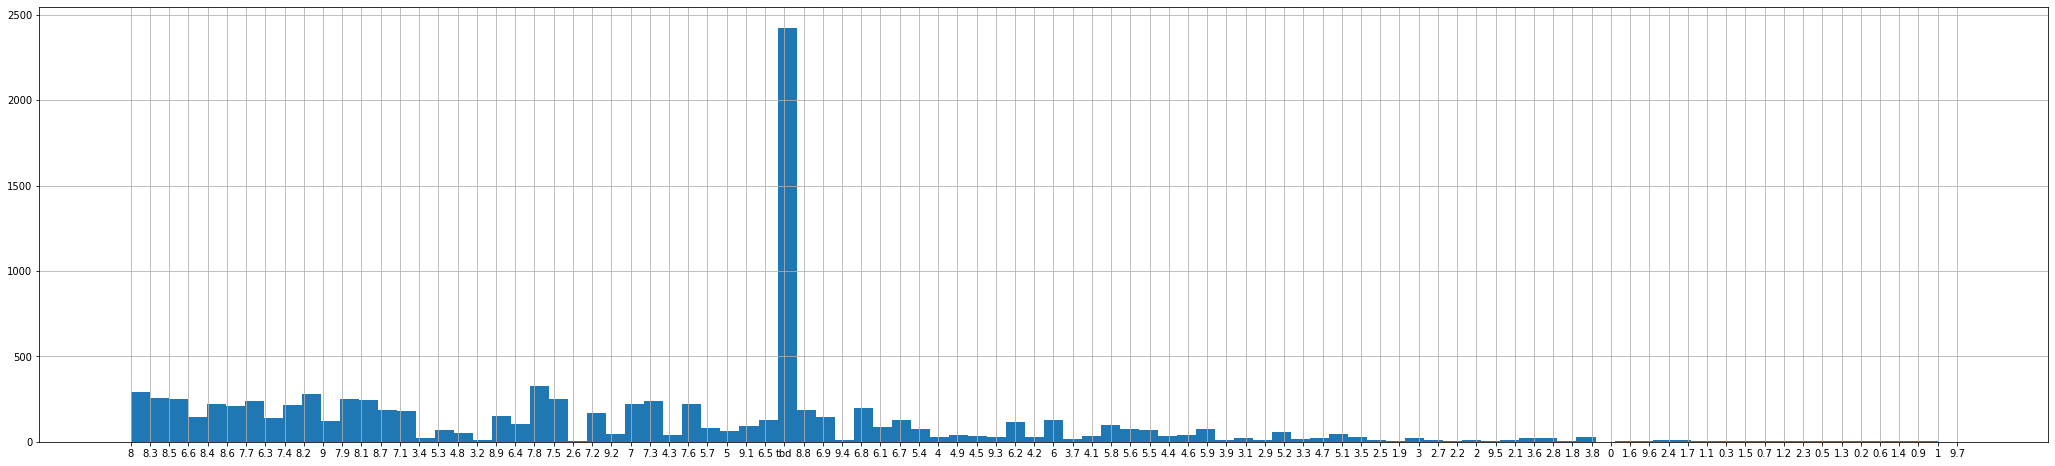

In [13]:
df['user_score'].hist(bins=(df['user_score'].nunique()),figsize=(36,8));

TDB сокращение, обозначающие что эту оценку или еще не поставили, но ожидается или вовсе не будет, видим что их очень много, судя по распрделению. Так как эти данные "неизвестны" то и приведем их к Nan

In [14]:
df['user_score']=df['user_score'].replace('tbd',np.nan)
df['user_score']=pd.to_numeric(df['user_score'])

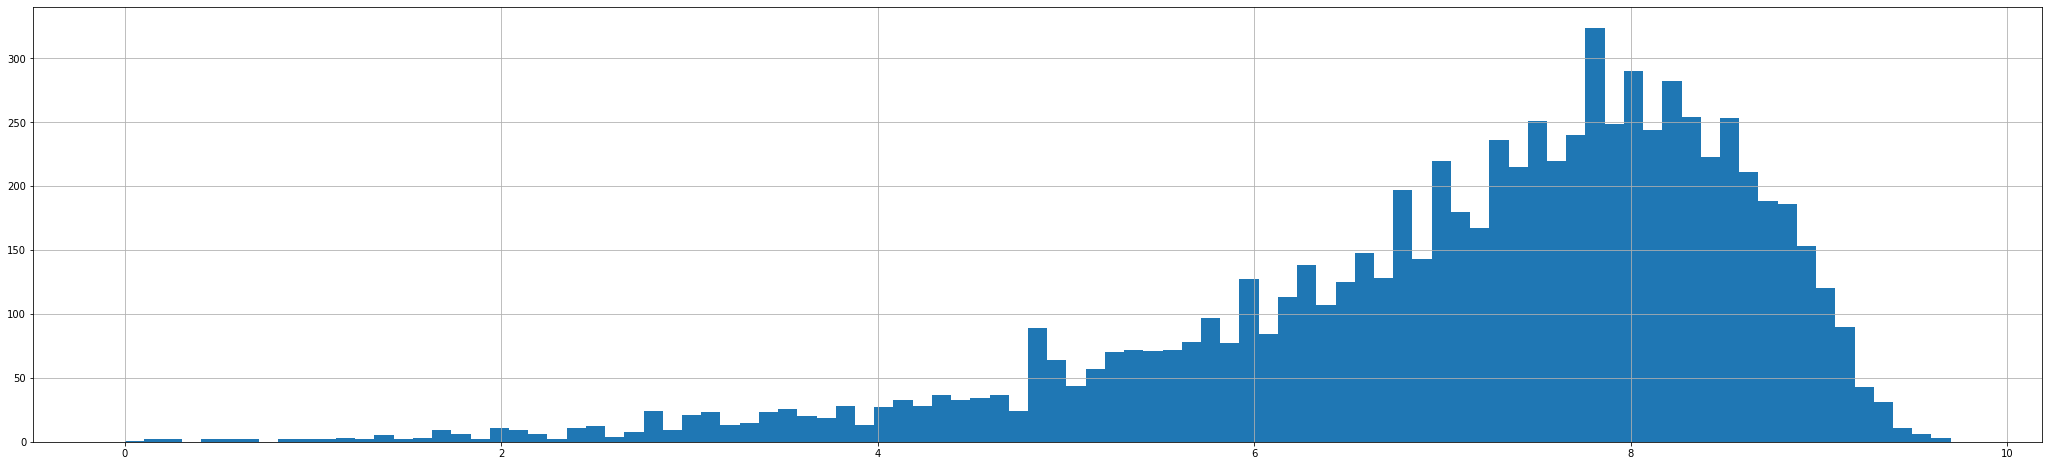

In [15]:
df['user_score'].hist(bins=(df['user_score'].nunique()),figsize=(36,8));

Без учета Nan имеем нормальное распределение со смещением влево

In [16]:
df.isna().sum()

name                  2
platform              0
year_of_release     254
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Имеем пропуски в названиях игр, жанре, оценках и рейтинге.
Я решил оставить пропуски в: годе релиза. В рейтинге наверное тоже имеет смысл оставить Nan, так как привести подобные рейтинги по известным данным я не вижу возможным, а если я буду приводить все наны к какому-нибудь unknown, то это перемешает все неизвестные рейтинги и исказит анализ.

В названии и жанре игры я удалю пропуски 

In [17]:
df[df['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в имени и жанре одни и те же

In [18]:
df=df.dropna(subset=['name'])
df.isna().sum()

name                  0
platform              0
year_of_release     254
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Оценки и рейтинги по разным платформам могут быть разные, подставлять рейтинг одной игры по ее аналогам на других платформах неправильно. В итоге получается что ничего не сделаешь с пропусками...нулями заполнять не корректно.

Я считаю что оставляю все так как есть сейчас. Поменять тип данных нельзя из-за наличия NaN...Честно сказать я не очень уверен как тут лучше поступать, есть вариант удалить NaNы, что бы можно было изменить тип данных, хотя бы в годе релиза. Это даст красивое число без запятых, но не более.

Посчитаю суммарные суммарные продажи во всех регионах

In [19]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# ШАГ 3

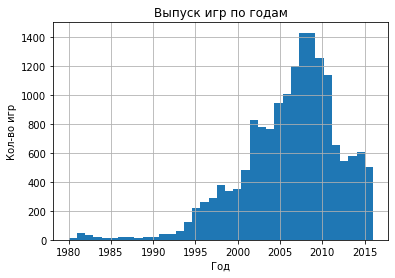

In [20]:
fig, ax = plt.subplots()
df['year_of_release'].plot(kind='hist',
                           bins=(df['year_of_release'].nunique()),\
                          grid=True)
plt.title('Выпуск игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Кол-во игр')
plt.show();

Возможно до 1990-1992 года выпускалось крайне мало игр, и вероятно на одну платформу. Думаю если спрашивать про то, есть ли менее важные данные, то они там. Но тем не менее думаю и их стоит учитывать в определенных случаях.

Топ 10 платформ по продажам за все время

In [21]:
top10_sales1=df.pivot_table(index=['platform'],values='total_sales'
               ,aggfunc='count').sort_values(by='total_sales',ascending=False).head(10)

In [22]:
top10_sales=df.pivot_table(index=['platform'],values='total_sales'
               ,aggfunc='sum').sort_values(by='total_sales',ascending=False).head(10)
top10_sales


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [23]:
#Проверка на совпадение топ-10 с sum и count
xxx=0
for i in top10_sales.index:
    if i in top10_sales1.index:
        xxx=xxx+1
        print(xxx,'/10') 

1 /10
2 /10
3 /10
4 /10
5 /10
6 /10
7 /10
8 /10
9 /10


In [24]:
top10_sales.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

In [25]:
df[(df['platform']=='DS') & \
   (df['year_of_release']<1986)] #Данные по одной продаже игры на DS в 1985 году. Наверное ее стоит удалить 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


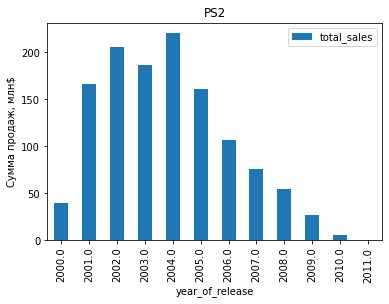

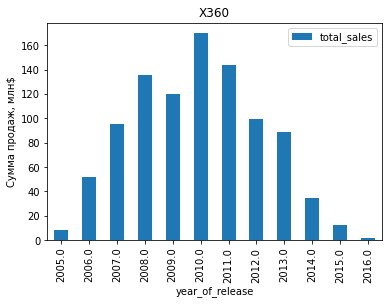

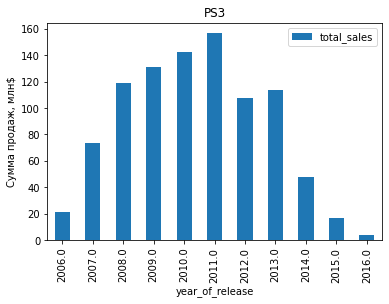

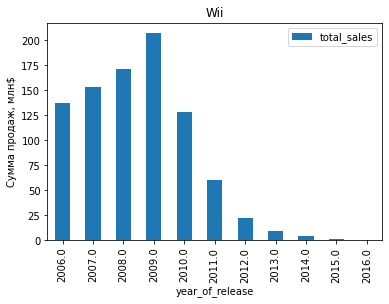

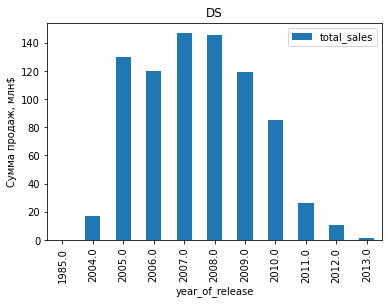

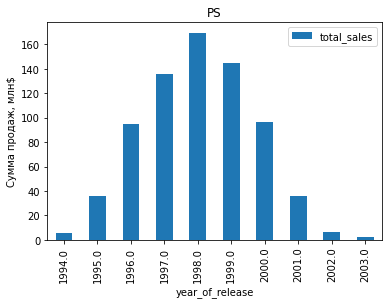

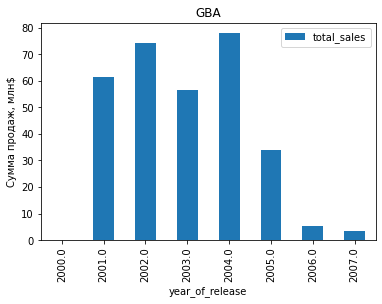

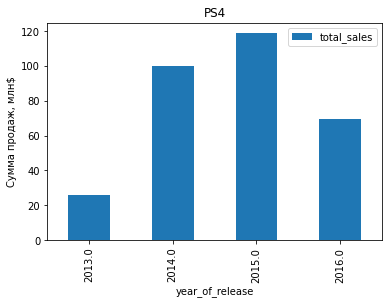

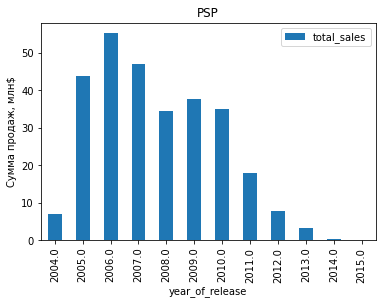

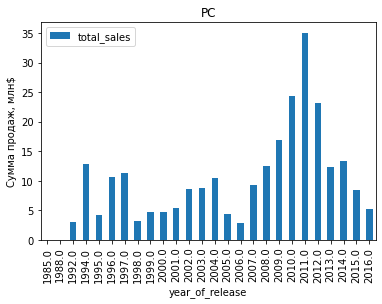

In [26]:
for i in top10_sales.index:
    df.query('platform ==@i').pivot_table(index=['year_of_release'],values='total_sales'
               ,aggfunc='sum').sort_values(by='year_of_release',ascending=True).plot(kind='bar').set_ylabel('Сумма продаж, млн$')
    plt.title(i)
    plt.show()

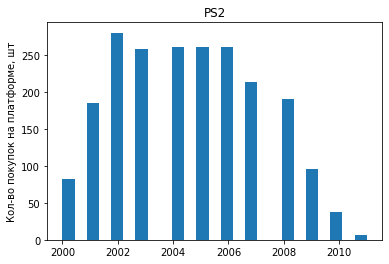

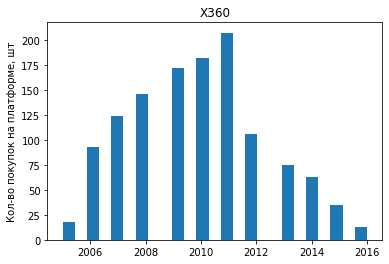

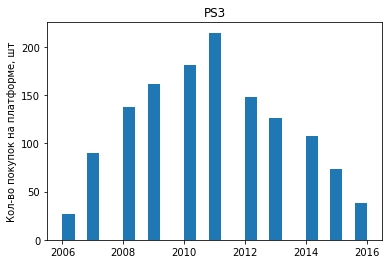

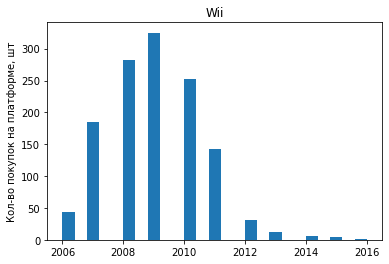

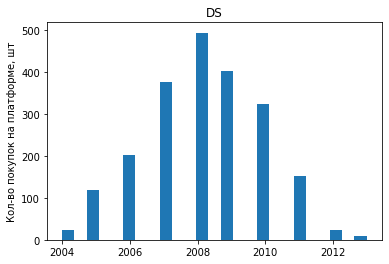

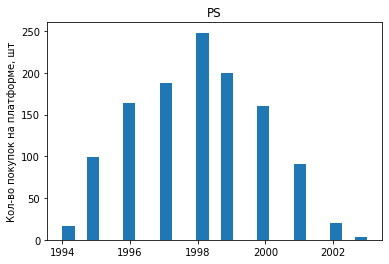

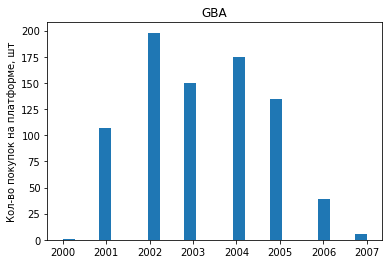

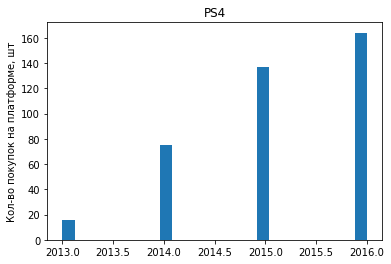

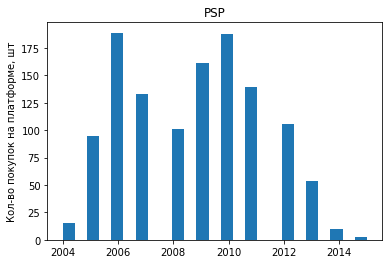

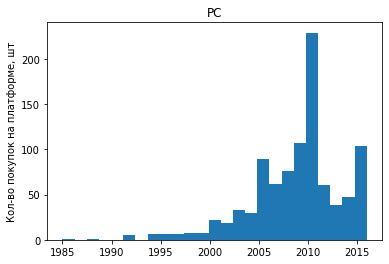

In [27]:
df=df[~((df['platform']=='DS') & (df['year_of_release']==1985))] #Удалил одиночную продажу в 1985 г
for i in top10_sales.index:
    df[df['platform']==i]['year_of_release'].plot(kind='hist',bins=25).set_ylabel('Кол-во покупок на платформе, шт')
    plt.title(i)
    plt.show()

По графикам видно, когда определенная платформа была наиболее популярна.

Так PS2 перестала продаваться в 2011 году, просуществовав 11 лет

Игры на DS начали продаваться в 1985(эм что) (пик продаж начался с 2004 и продавался до 2013)

Игры на PS3 начали продаваться в 2006 и продаются до 2016(в 2017 игры на нее очевидно все еще будут продаваться)

Игры на Wii начали продаваться в 2006 и продается до 2016(в 2017 игры на нее Вряд ли все еще будут продаваться)

Игры на Xbox 360 начали продаваться в 2005 и продаются до 2016(в 2017 игры на нее очевидно все еще будут продаваться)

Игры на PSP продавались с 2004 по 2015 год

Игры на PS начали продаваться в 1994 и продавались до 2003

Игры на ПК начали продаваться в 1985 году и продаются до сих пор. Скачки по продажам думаю показывают, что в этом время выходили игры на конкурентных платформах

Игры на XB продавались с 2000 по 2008 год

Игры на GBA начали продаваться в 2000 и продавались до 2007






Для возможного предсказания продаж игр в 2017 году, предлагаю взять временной промежуток в 5 лет. 10 слишком много, а если за 5 лет уже прекратились продажи (а такое есть, судя по предидущему анализу, то нет смысла брать больший промежуток)

В задании на данном этапе требуется сформировать актуальный диапазон дат, соответвенно для него получится и новые топы по продажам top10_sales_5y и top10_sales_3y
Ящик с усами по продажам игр по топ платформам, продаваемых за посление 5 лет

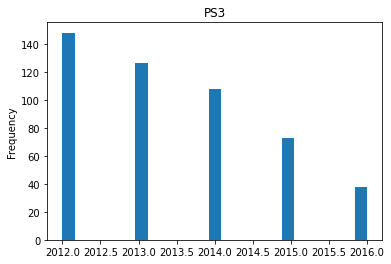

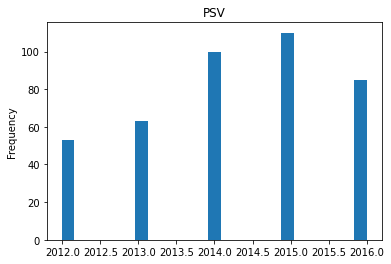

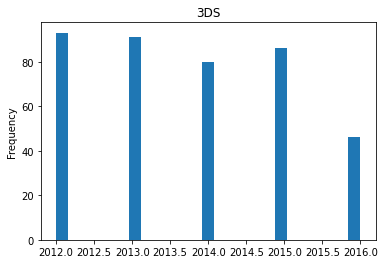

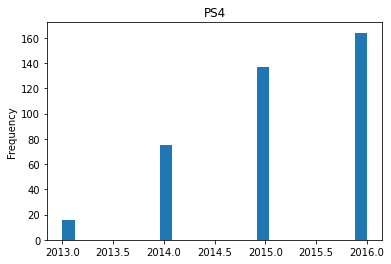

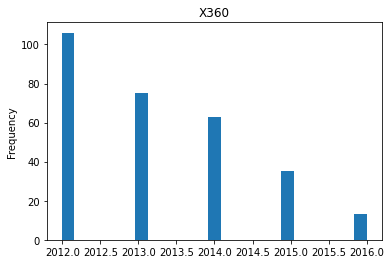

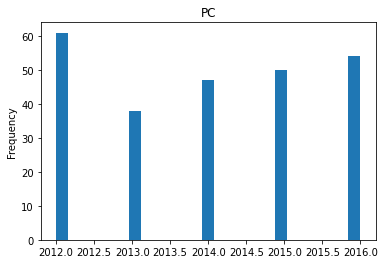

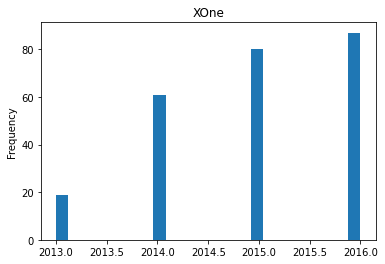

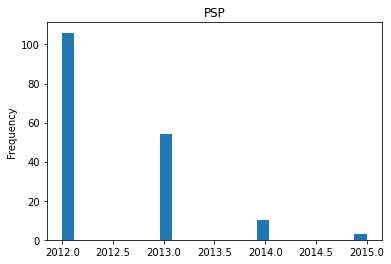

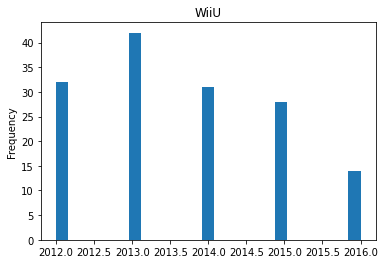

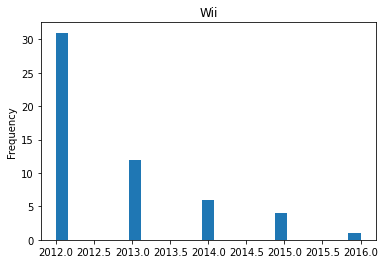

In [28]:
df_5year=df.query('year_of_release>2011')
df_3year=df.query('year_of_release>2013')#Это для построения боксплотов, чтоб уменьшить выбросы

top10_sales_5y=df_5year.pivot_table(index=['platform'],values='name'
               ,aggfunc='count').sort_values(by='name',ascending=False).head(10)#Это список топ платформ за последние 5 лет
top10_sales_3y=df_3year.pivot_table(index=['platform'],values='name'
               ,aggfunc='count').sort_values(by='name',ascending=False).head(10)#Это за 3 года

for i in top10_sales_5y.index:
    df_5year[df_5year['platform']==i]['year_of_release'].plot(kind='hist',bins=25)
    plt.title(i)
    plt.show()

Вот пожалуйста, в 2017 году точно мы не увидим GBA,PS,PS2, DS, XB, PSP. Вероятно очень малые продажу будут у игр на Wii,X360 . 

Уменьшатся продажи у игр на PS3,WiiU ,3DS,PSV

Вероятно возрастут продажи на ПК, XOne, PS4  - это самая перспективная платформа для игр

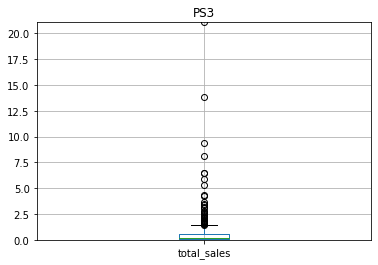

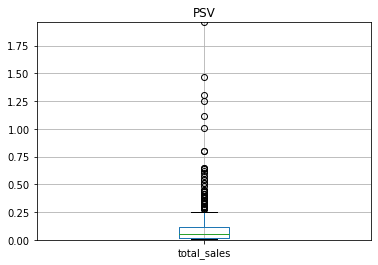

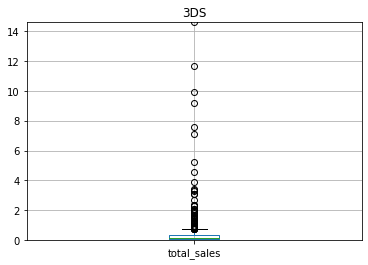

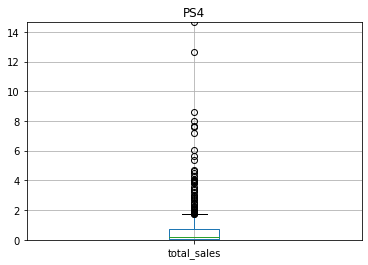

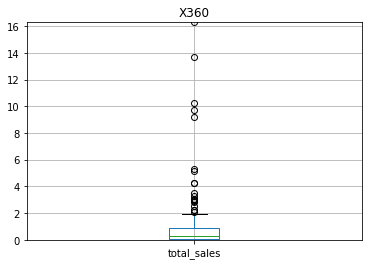

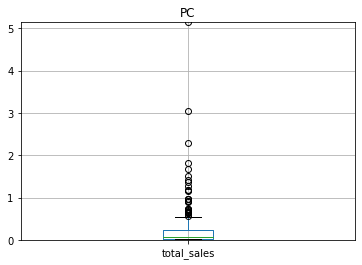

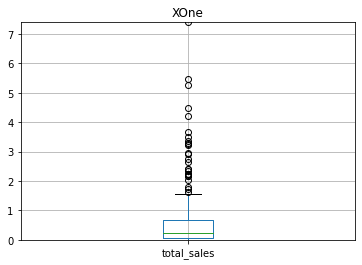

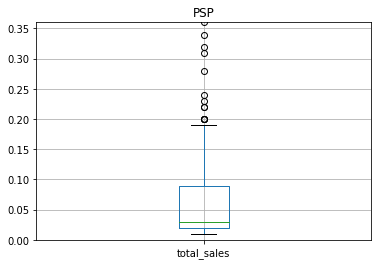

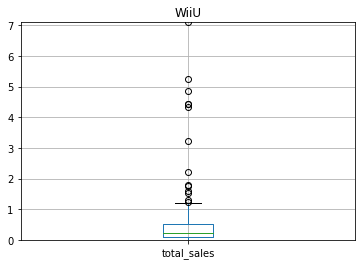

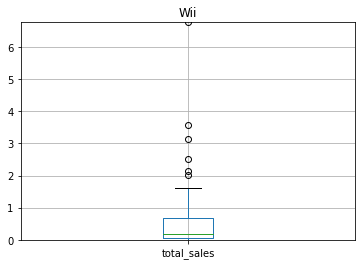

In [29]:
not_sales=['GBA','PS','PS2', 'DS','XB']


for i in top10_sales_5y.index:
    df_5year[df_5year['platform']==i].boxplot(column ='total_sales',grid = True)
    plt.ylim(0,df_5year[df_5year['platform']==i]['total_sales'].max())
    plt.title(i)
    plt.show()#

Видим диаграмму размаха. Так как данные за 5 лет- имеем большие выбросы(в лучшие года продаж игры). Чтобы лучше оценить квартильные значения я посмтроил по 3 годам и скорректировал масштаб по высоте для каждого графика (теперь это 50% от максимального значения продаж для данной платформы)

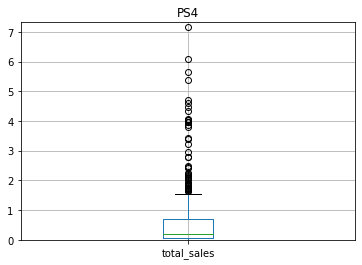

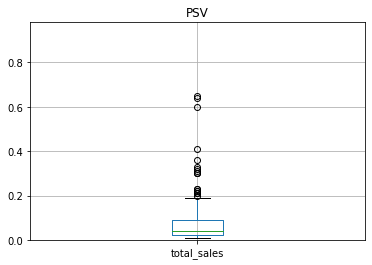

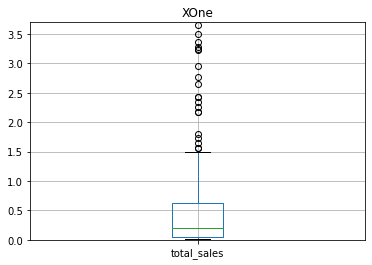

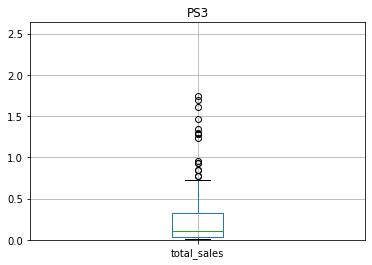

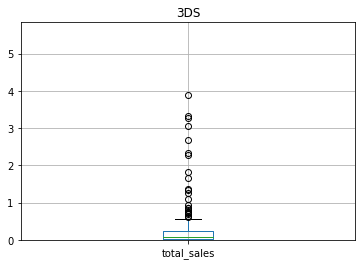

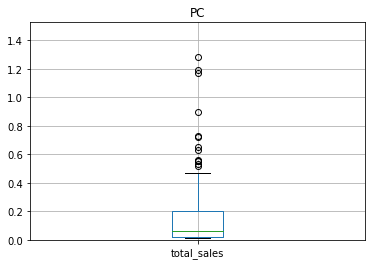

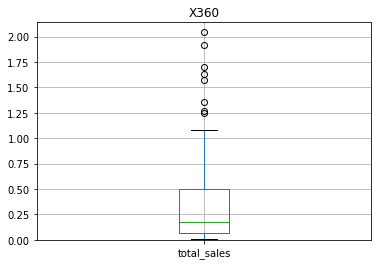

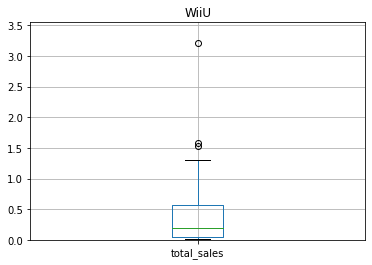

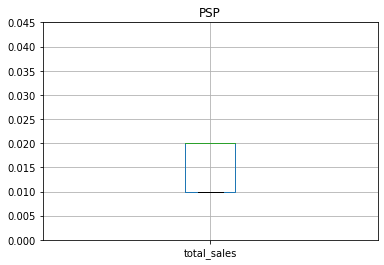

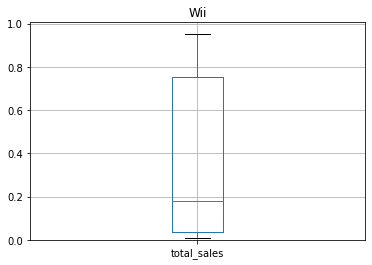

In [30]:
for i in top10_sales_3y.index:
    df_3year[df_3year['platform']==i].boxplot(column ='total_sales',grid = True)
    plt.ylim(0,0.5*(df_3year[df_3year['platform']==i]['total_sales'].max()))
    plt.title(i)
    plt.show()

По данным диаграммам размаха можно оценить ключвые значения продаж по выбранным платфорам за 3 последних года. Видно что выборки в основном смещены вправо, то есть тело находится в диапозоне невысоких продаж, но распределение медленно рассеивается вправо к играм, которые собирали больше всего продаж на платформе. То есть игр с наибольшими продажами тем меньше, чем больше они собрали продаж. Интересная обстановка с платформой Wii, там медианное значение так же находится низко, но в целом выборка компактная, что говорит о стабильности продаваемых игр.

Построим диаграмму рассеиния по продажам и отзывам

In [33]:
translate={'user_score':'Юзеры','critic_score':'Критики'}

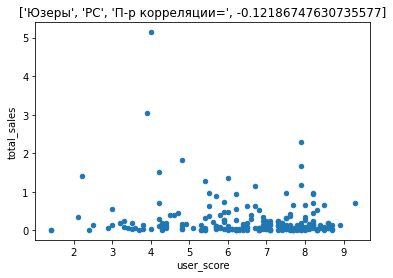

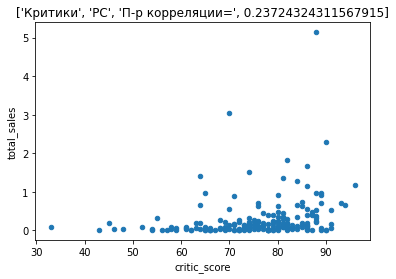

In [34]:
for i in ['PC']:
    for j in ['user_score','critic_score']:
        df_5year[df_5year['platform']==i].plot(y='total_sales',x=j,kind='scatter')
        plt.title([translate[j],i,'П-р корреляции=',df_5year[df_5year['platform']==i][j].\
               corr(df_5year[df_5year['platform']==i]['total_sales'])])
        plt.show()

Рассмотрена диаграмма рассения зависимости продаж от отзывов пользователей и критиков игр на ПК. Имеем очень незначительную положительную корреляцию для отзывов критиков. От отзывов пользователей корреляция отсутсвует.

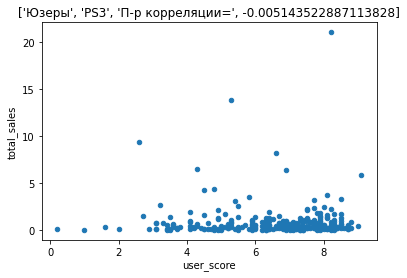

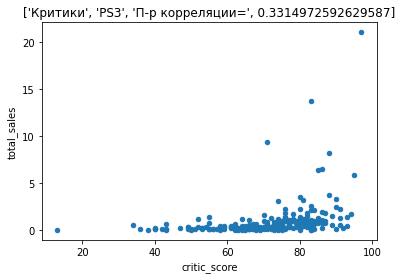

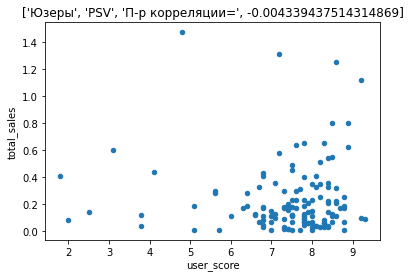

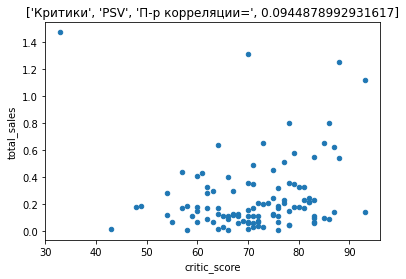

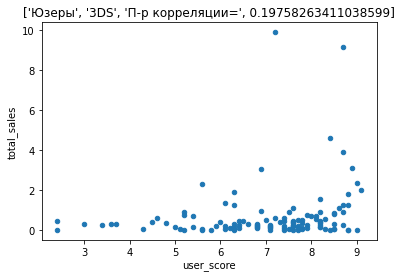

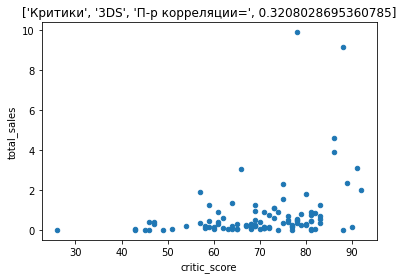

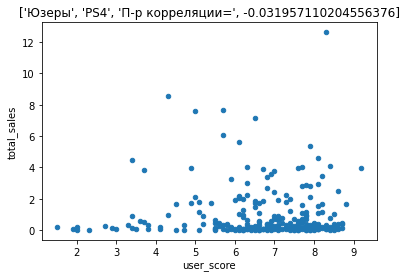

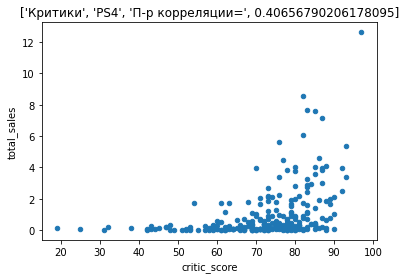

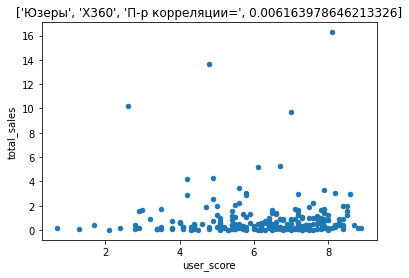

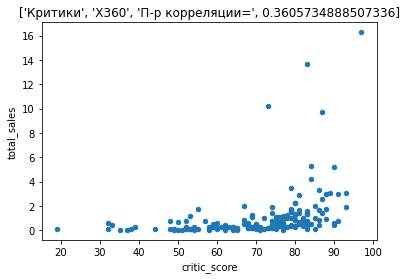

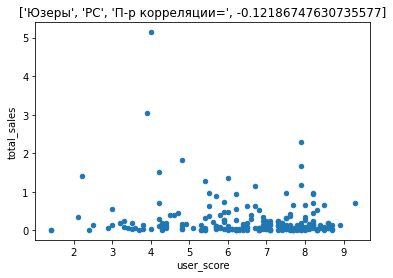

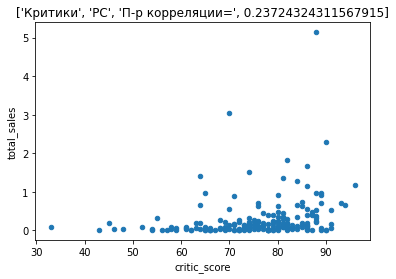

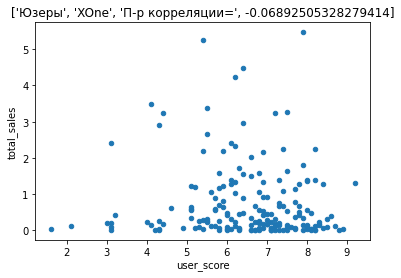

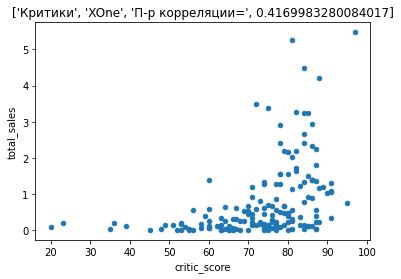

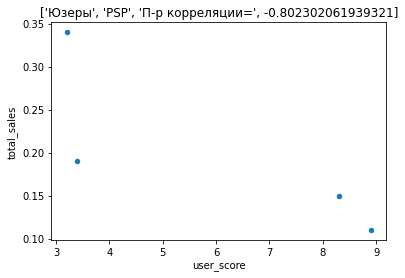

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


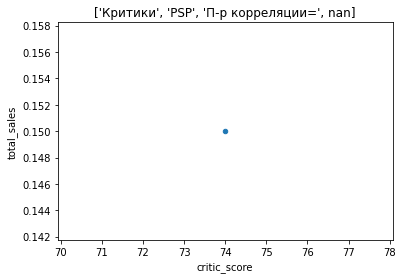

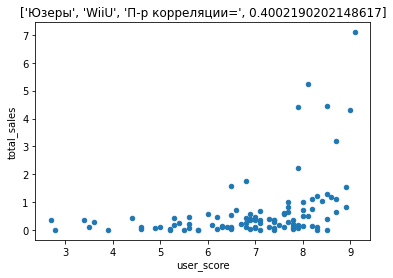

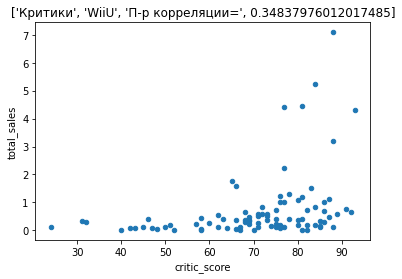

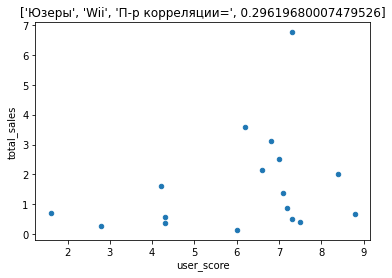

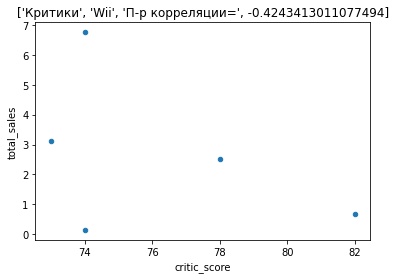

In [35]:
for i in top10_sales_5y.index:
    for j in ['user_score','critic_score']:
        df_5year[df_5year['platform']==i].plot(y='total_sales',x=j,kind='scatter')
        plt.title([translate[j],i,'П-р корреляции=',df_5year[df_5year['platform']==i][j].\
               corr(df_5year[df_5year['platform']==i]['total_sales'])])
        plt.show()

Судя по анализу, оценки пользователей не играют роли в продажах. Да и оценки критиков имеют совсем незначительное влияние, но все же большее, чем игроков.

Построим распределение игр по жанрам.

In [36]:
top_genre=df_5year.pivot_table(index='genre',\
                               aggfunc={'genre':'count','total_sales':'mean'}).sort_values(by='total_sales',\
                                                                                          ascending=False)
top_genre.columns=['count','total_sales']
top_genre

,count,total_sales
genre,,
Shooter,235,1.296723
Platform,85,0.717647
Sports,268,0.675634
Role-Playing,370,0.521081
Racing,115,0.465217
Misc,192,0.442917
Simulation,80,0.439000
Action,1031,0.427856
Fighting,109,0.408165


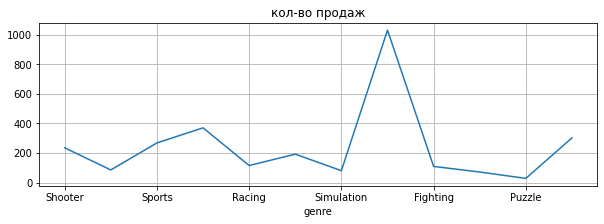

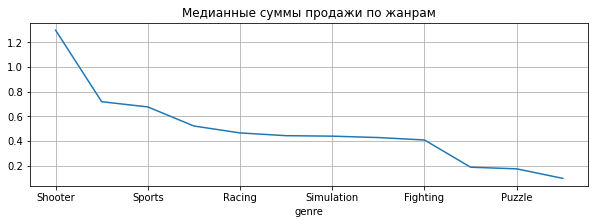

''

In [37]:
plt.title('кол-во продаж')
top_genre['count'].plot(grid=True,figsize=(10,3))
plt.show()

plt.title('Медианные суммы продажи по жанрам')
top_genre['total_sales'].plot(grid=True,figsize=(10,3))
plt.show()
;

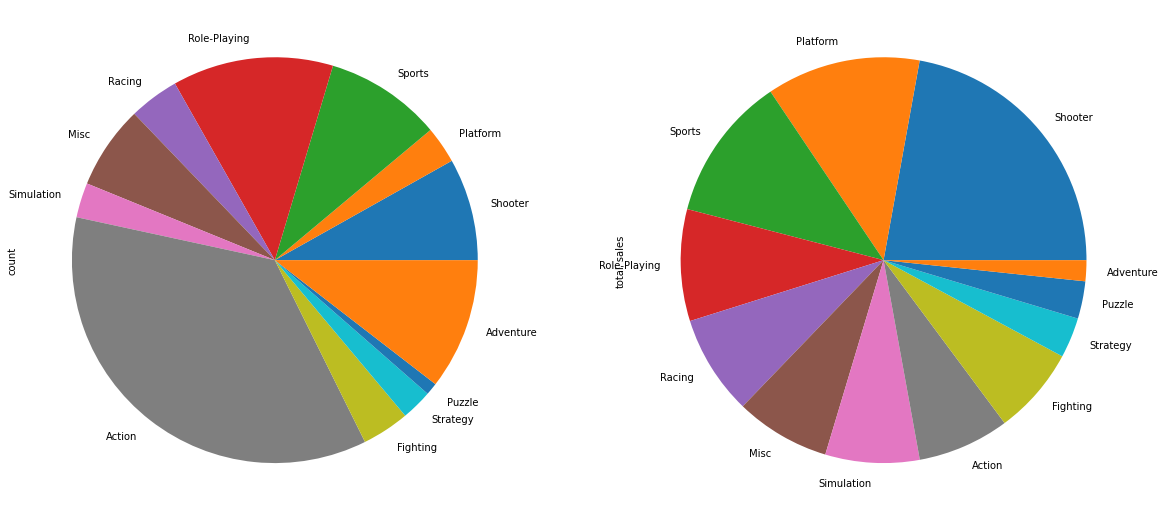

In [38]:
top_genre.plot(grid=True,figsize=(20,20),kind='pie',subplots=True, legend=False);

По графику и круговой диаграмме видим, что самый популярный жанр это Actin, но самый прибыльный это Shoter. Получается что Экшены популярны, но по итогу в них много провальных игр. Самые непопулярные игры это Пазлы, но по прибыли они обходят те же Приключения

# ШАГ 4

In [39]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Определим портреты для регионов NA, EU, JP

Топ 5 платформ по продажам.

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

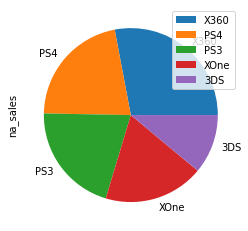

In [40]:
df_5year.pivot_table(index=['platform'],values='na_sales',aggfunc={'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind="pie", subplots=True)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


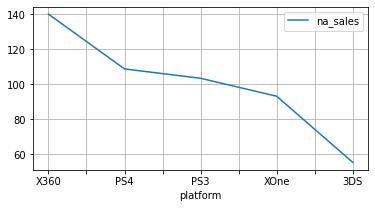

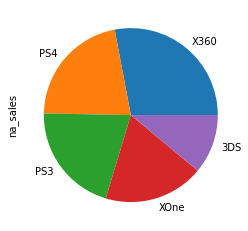

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


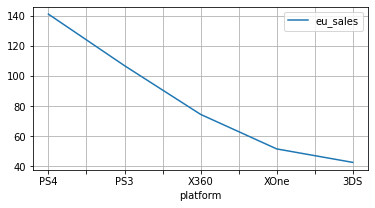

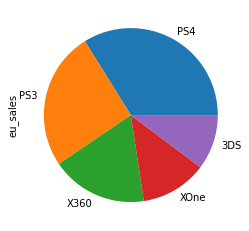

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


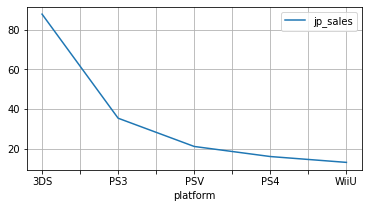

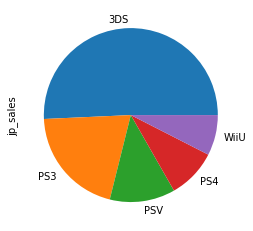

In [41]:
regs=['na_sales','eu_sales','jp_sales']
for i in regs:
    top_plat_genre_regs=df_5year.pivot_table(index=['platform'],values=[i],aggfunc={i:'sum'}).sort_values(by=i,ascending=False)
    display(top_plat_genre_regs.head())
    top_plat_genre_regs.head().plot(grid=True,figsize=(6,3))
    plt.show()
    top_plat_genre_regs.head().plot(grid=True,figsize=(4,4),kind='pie',subplots=True, legend=False)
    plt.show()


В NA самая популярная платформа X360,в EU самая популярная платформа PS4, а вот в Японии 3DS. Основная разница в том, что японский регион имеет в топ 5 покупаемых платформ WiiU, вместо XOne. Что производят в то и играют)

Топ жанров

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


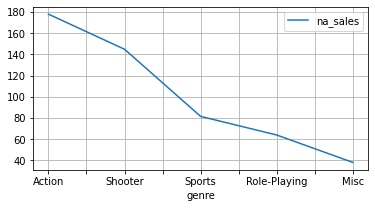

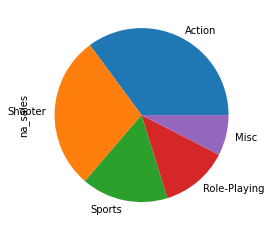

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


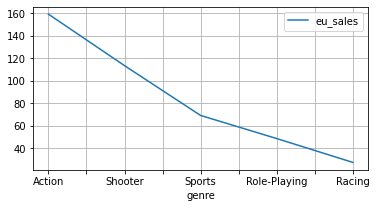

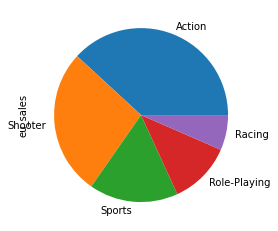

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


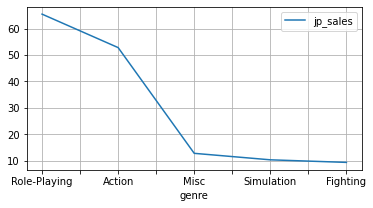

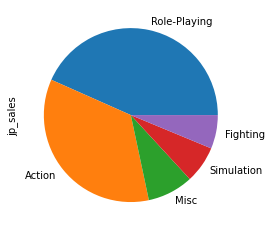

In [42]:

for i in regs:
    top_plat_genre_regs=df_5year.pivot_table(index=['genre'],values=[i],aggfunc={i:'sum'}).sort_values(by=i,ascending=False)
    display(top_plat_genre_regs.head())
    top_plat_genre_regs.head().plot(grid=True,figsize=(6,3))
    plt.show()
    top_plat_genre_regs.head().plot(grid=True,figsize=(4,4),kind='pie',subplots=True, legend=False)
    plt.show()

Топ-5 жанров игр почти все одинаковые, за исключение Японии, там  Fighting предпочитают Platform.

Проанализируем влияет ли рейтинг на продажи по регионам.

In [43]:
df_5year=df_5year.reset_index(drop=True) 

In [44]:
df_5year['rating']=df_5year['rating'].fillna('not_rated')

,na_sales
rating,
M,231.57
E,114.37
not_rated,103.31
E10+,75.70
T,66.02


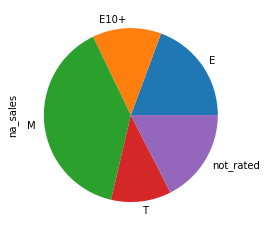

,eu_sales
rating,
M,193.96
E,113.03
not_rated,91.50
E10+,55.37
T,52.96


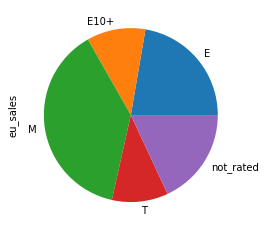

,jp_sales
rating,
not_rated,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


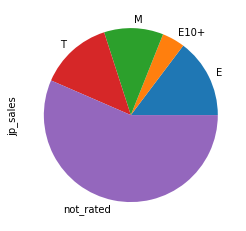

In [45]:

for i in regs:
    top_plat_genre_regs=df_5year.pivot_table(index=['rating'],values=[i],aggfunc={i:'sum'}).head()
    display(top_plat_genre_regs.sort_values(by=i,ascending=False))
    top_plat_genre_regs.plot(grid=True,figsize=(4,4),kind='pie',subplots=True, legend=False)
    plt.show()

Да, рейтинг влияет на продажи, и в каждом регионе по-разному. Так например в NA и EU преобладают продажи игр с рейтингом М и в целом распределение одинаково, а вот в Японии картина обратная, М предпоследний Е10+ последний. Хотя в японском регионе незначительная разница Е Т М рейтингов, в целом это видно.

Так же имеются игры без рейтинга. Они имеют подавляющее большенство в японии, и занимаются средние позиции в EU NA регионах

# ШАГ 5

Ho - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, Альтернативная гиоптеза - Средние пользовательские рейтинги платформ Xbox One и PC разные.

Применяю метод st.ttest_ind, так как сравниваем средние двух выборок.

Кажется это двусторонняя гипотеза, и мне стоит pvalue поделить пополам(Я этого пока не сделал, так как значения и так далеко уходят от alpha, и результат не изменится. Прав я с двусторонностью?)

In [46]:
alpha=0.05
user_r_xone=df_5year[df_5year['platform']=='XOne']['user_score'].dropna()
user_r_pc=df_5year[df_5year['platform']=='PC']['user_score'].dropna()
results = st.ttest_ind(user_r_xone, user_r_pc,equal_var = True)

if results.pvalue>alpha:
    print('pvalue=',results.pvalue, "Принимаем нулевую гипотезу")
else:
    print(results.pvalue, "Отвергаем нулевую гипотезу")


pvalue= 0.5535080500643661 Принимаем нулевую гипотезу


In [47]:
print('Среднее по XOne',round(df_5year[df_5year['platform']=='XOne']['user_score'].mean(),3))
print('Среднее по PC',round(df_5year[df_5year['platform']=='PC']['user_score'].mean(),3))

Среднее по XOne 6.521
Среднее по PC 6.429


Ho - Средние пользовательские рейтинги жанров Action и Sports одинаковые., Альтернативная гиоптеза - Средние пользовательские рейтинги жанров Action и Sports различные.

Применяю метод st.ttest_ind, так как сравниваем средние двух выборок.

In [48]:
user_r_action=df_5year[df_5year['genre']=='Action']['user_score'].dropna()
user_r_sports=df_5year[df_5year['genre']=='Sports']['user_score'].dropna()
results = st.ttest_ind(user_r_action, user_r_sports,equal_var = True)
if results.pvalue>alpha:
    print('pvalue=',results.pvalue,"Принимаем нулевую гипотезу" )
else:
    print(results.pvalue, "Отвергаем нулевую гипотезу")

3.7163089460934874e-26 Отвергаем нулевую гипотезу


In [49]:
print('Среднее по Action',round(df_5year[df_5year['genre']=='Action']['user_score'].mean(),3))
print('Среднее по Sports',round(df_5year[df_5year['genre']=='Sports']['user_score'].mean(),3))

Среднее по Action 6.825
Среднее по Sports 5.456


# ШАГ 6

### Общий вывод

В результате выполнения проекта, я проанализировал данные о продаже видео игр. 
Выполнил предобработку данных, посчитал суммарные продажи во всех регионах

Получили распределение по продажам игр за каждый год.
Самые популярные платформы игр : 'PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA'.

#### Определил время продажи игр на популярных платформах:
Так PS2 перестала продаваться в 2011 году, просуществовав 11 лет

Игры на DS начали продаваться в 1985(эм что) (пик продаж начался с 2004 и продавался до 2013)

Игры на PS3 начали продаваться в 2006 и продаются до 2016(в 2017 игры на нее очевидно все еще будут продаваться)

Игры на Wii начали продаваться в 2006 и продается до 2016(в 2017 игры на нее Вряд ли все еще будут продаваться)

Игры на Xbox 360 начали продаваться в 2005 и продаются до 2016(в 2017 игры на нее очевидно все еще будут продаваться)

Игры на PSP продавались с 2004 по 2015 год

Игры на PS начали продаваться в 1994 и продавались до 2003

Игры на ПК начали продаваться в 1985 году и продаются до сих пор. Скачки по продажам думаю показывают, что в этом время выходили игры на конкурентных платформах

Игры на XB продавались с 2000 по 2008 год

Игры на GBA начали продаваться в 2000 и продавались до 2007

#### Проанализировал как проходили продажи за последние 5 лет, и что ожидается в 2017 году:
В 2017 году точно мы не увидим GBA,PS,PS2, DS, XB, PSP. Вероятно очень малые продажу будут у игр на Wii,X360 . 

Уменьшатся продажи у игр на PS3,WiiU ,3DS,PSV

Вероятно возрастут продажи на ПК, XOne, PS4  - это самая перспективная платформа для игр

##### Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам
По данным диаграммам размаха можно оценить ключвые значения продаж по выбранным платфорам за 3 последних года. Видно что выборки в основном смещены вправо, то есть тело находится в диапозоне невысоких продаж, но распределение медленно рассеивается вправо к играм, которые собирали больше всего продаж на платформе. То есть игр с наибольшими продажами тем меньше, чем больше они собрали продаж. Интересная обстановка с платформой Wii, там медианное значение так же находится низко, но в целом выборка компактная, что говорит о стабильности продаваемых игр.



##### Рассмотрена диаграмма рассения зависимости продаж от отзывов пользователей игр на ПК. 
Рассмотрена диаграмма рассения зависимости продаж от отзывов пользователей и критиков игр на ПК. Имеем очень незначительную положительную корреляцию для отзывов критиков. От отзывов пользователей корреляция отсутсвует.
Судя по анализу, оценки пользователей не играют роли в продажах. Да и оценки критиков имеют совсем незначительное влияние, но все же большее, чем игроков.

##### Построено общее распределение игр по жанрам

По графику и круговой диаграмме видим, что самый популярный жанр это Actin, но самый прибыльный это Shoter. Получается что Экшены популярны, но по итогу в них много провальных игр. Самые непопулярные игры это Пазлы, но по прибыли они обходят те же Приключения


##### Составлен портрет для пользователя каждого региона (NA, EU, JP)
В NA самая популярная платформа X360,в EU самая популярная платформа PS4, а вот в Японии 3DS. Основная разница в том, что японский регион имеет в топ 5 покупаемых платформ WiiU, вместо XOne. Что производят в то и играют)

Топ-5 жанров игр почти все одинаковые, за исключение Японии, там  Fighting предпочитают Platform.

##### Установил влияние рейтинга на продажи игр.
Да, рейтинг влияет на продажи, и в каждом регионе по-разному. Так например в NA и EU преобладают продажи игр с рейтингом М и в целом распределение одинаково, а вот в Японии картина обратная, М предпоследний Е10+ последний. Хотя в японском регионе незначительная разница Е Т М рейтингов, в целом это видно.

Так же имеются игры без рейтинга. Они имеют подавляющее большенство в японии, и занимаются средние позиции в EU NA регионах

##### Выполнил анализ гипотез.
Принял гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Отверг гипотезу "Средние пользовательские рейтинги жанров Action и Sports одинаковые."